In [1]:
import jax
import jax.numpy as jnp
from jax import random

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("./"))))

from jaxmeta.model_init import init_siren_params

from training import Agent
from loss import model, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn
import config

config.n_data = {
	"i": 100,
	"cx": 201, 
	"ct": 1001,
	"quad": 16,
}
config.batch_size = {
	"dirichlet": 100,
	"collocation": 20000,
}
config.weights = {
	"c1": 1.0,
	"c2": 1.0,
	"d1": 100.0,
	"d2": 1.0,
	"l1": 1e-8,
	"l2": 1e-8,
}
config.iterations = 20000
config.print_every = 1000
config.save_every = 100000
config.lr = 1e-4

key, *subkeys = random.split(config.key, 3)
params = init_siren_params(subkeys[0], config.layers, config.c0, config.w0)

datasets = generate_dataset(config.n_data["i"], config.n_data["cx"], config.n_data["ct"], config.n_data["quad"])
batch_fn, evaluate_batch_fn = generate_batch_fn(subkeys[1], config.batch_size, *datasets, config.weights)

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/10, 18:05:46, Iteration: 1000, Train Loss: 1.7100e+01, c1: 2.1630e-01, c2: 3.9866e-01, d1: 1.6476e-01, d2: 9.3972e-03, l1_reg: 3.1940e+02, l2_reg: 4.6382e+01
2020/09/10, 18:05:59, Iteration: 2000, Train Loss: 1.6775e+01, c1: 2.0822e-01, c2: 6.0435e-01, d1: 1.5951e-01, d2: 1.1115e-02, l1_reg: 3.2325e+02, l2_reg: 4.7833e+01
2020/09/10, 18:06:11, Iteration: 3000, Train Loss: 1.7208e+01, c1: 1.8845e-01, c2: 6.0492e-01, d1: 1.6405e-01, d2: 1.0524e-02, l1_reg: 3.2624e+02, l2_reg: 4.8988e+01
2020/09/10, 18:06:24, Iteration: 4000, Train Loss: 6.9689e+00, c1: 2.4325e-01, c2: 6.3931e-01, d1: 6.0732e-02, d2: 1.3208e-02, l1_reg: 3.3962e+02, l2_reg: 5.4361e+01
2020/09/10, 18:06:37, Iteration: 5000, Train Loss: 4.5501e+00, c1: 2.5096e-01, c2: 6.8328e-01, d1: 3.6013e-02, d2: 1.4525e-02, l1_reg: 3.4653e+02, l2_reg: 5.7139e+01
2020/09/10, 18:06:50, Iteration: 6000, Train Loss: 3.9549e+00, c1: 2.4782e-01, c2: 6.8222e-01, d1: 3.0046e-02, d2: 2.0254e-02, l1_reg: 3.5080e+02, l2_reg: 5.8867e+01
2020

In [4]:
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/10, 18:11:18, Iteration: 21000, Train Loss: 8.2634e-01, c1: 2.0892e-01, c2: 3.6913e-01, d1: 2.3539e-03, d2: 1.2889e-02, l1_reg: 3.7614e+02, l2_reg: 7.0584e+01
2020/09/10, 18:11:30, Iteration: 22000, Train Loss: 8.1312e-01, c1: 2.0851e-01, c2: 3.6588e-01, d1: 2.2730e-03, d2: 1.1426e-02, l1_reg: 3.7636e+02, l2_reg: 7.0728e+01
2020/09/10, 18:11:44, Iteration: 23000, Train Loss: 8.0379e-01, c1: 2.0706e-01, c2: 3.6529e-01, d1: 2.2171e-03, d2: 9.7314e-03, l1_reg: 3.7658e+02, l2_reg: 7.0851e+01
2020/09/10, 18:11:57, Iteration: 24000, Train Loss: 7.4774e-01, c1: 2.0257e-01, c2: 3.5495e-01, d1: 1.8142e-03, d2: 8.8008e-03, l1_reg: 3.7679e+02, l2_reg: 7.0964e+01
2020/09/10, 18:12:10, Iteration: 25000, Train Loss: 8.2918e-01, c1: 2.0333e-01, c2: 3.5764e-01, d1: 2.5930e-03, d2: 8.9149e-03, l1_reg: 3.7695e+02, l2_reg: 7.1056e+01
2020/09/10, 18:12:22, Iteration: 26000, Train Loss: 8.2134e-01, c1: 2.0163e-01, c2: 3.5901e-01, d1: 2.5246e-03, d2: 8.2314e-03, l1_reg: 3.7710e+02, l2_reg: 7.1130e+0

In [5]:
config.iterations = 200000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/10, 18:36:47, Iteration: 41000, Train Loss: 6.4290e-01, c1: 1.8448e-01, c2: 3.1602e-01, d1: 1.3797e-03, d2: 4.4193e-03, l1_reg: 3.7916e+02, l2_reg: 7.1991e+01
2020/09/10, 18:37:00, Iteration: 42000, Train Loss: 6.7764e-01, c1: 1.8287e-01, c2: 3.1333e-01, d1: 1.7677e-03, d2: 4.6582e-03, l1_reg: 3.7929e+02, l2_reg: 7.2047e+01
2020/09/10, 18:37:12, Iteration: 43000, Train Loss: 6.2695e-01, c1: 1.8166e-01, c2: 3.0867e-01, d1: 1.3248e-03, d2: 4.1421e-03, l1_reg: 3.7942e+02, l2_reg: 7.2106e+01
2020/09/10, 18:37:25, Iteration: 44000, Train Loss: 6.0016e-01, c1: 1.7911e-01, c2: 3.0903e-01, d1: 1.0744e-03, d2: 4.5764e-03, l1_reg: 3.7955e+02, l2_reg: 7.2168e+01
2020/09/10, 18:37:38, Iteration: 45000, Train Loss: 6.2694e-01, c1: 1.8214e-01, c2: 3.0931e-01, d1: 1.3129e-03, d2: 4.2027e-03, l1_reg: 3.7968e+02, l2_reg: 7.2228e+01
2020/09/10, 18:37:50, Iteration: 46000, Train Loss: 6.5336e-01, c1: 1.7959e-01, c2: 3.1216e-01, d1: 1.5761e-03, d2: 3.9945e-03, l1_reg: 3.7982e+02, l2_reg: 7.2295e+0

2020/09/10, 18:47:25, Iteration: 91000, Train Loss: 5.1148e-01, c1: 1.5632e-01, c2: 2.5066e-01, d1: 1.0285e-03, d2: 1.6462e-03, l1_reg: 3.8406e+02, l2_reg: 7.4424e+01
2020/09/10, 18:47:38, Iteration: 92000, Train Loss: 5.2361e-01, c1: 1.5772e-01, c2: 2.5544e-01, d1: 1.0905e-03, d2: 1.3935e-03, l1_reg: 3.8413e+02, l2_reg: 7.4455e+01
2020/09/10, 18:47:51, Iteration: 93000, Train Loss: 4.9345e-01, c1: 1.5630e-01, c2: 2.4821e-01, d1: 8.7595e-04, d2: 1.3444e-03, l1_reg: 3.8420e+02, l2_reg: 7.4486e+01
2020/09/10, 18:48:04, Iteration: 94000, Train Loss: 5.0218e-01, c1: 1.5470e-01, c2: 2.4738e-01, d1: 9.8751e-04, d2: 1.3406e-03, l1_reg: 3.8427e+02, l2_reg: 7.4520e+01
2020/09/10, 18:48:17, Iteration: 95000, Train Loss: 5.8422e-01, c1: 1.5330e-01, c2: 2.4796e-01, d1: 1.8147e-03, d2: 1.4934e-03, l1_reg: 3.8434e+02, l2_reg: 7.4553e+01
2020/09/10, 18:48:30, Iteration: 96000, Train Loss: 4.9465e-01, c1: 1.5239e-01, c2: 2.5232e-01, d1: 8.8497e-04, d2: 1.4373e-03, l1_reg: 3.8439e+02, l2_reg: 7.4581e+0

2020/09/10, 18:57:53, Iteration: 140000, Train Loss: 4.5705e-01, c1: 1.4002e-01, c2: 2.2674e-01, d1: 8.9454e-04, d2: 8.3327e-04, l1_reg: 3.8667e+02, l2_reg: 7.5769e+01


/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/10, 18:58:05, Iteration: 141000, Train Loss: 4.1117e-01, c1: 1.3670e-01, c2: 2.1911e-01, d1: 5.4418e-04, d2: 9.3496e-04, l1_reg: 3.8671e+02, l2_reg: 7.5792e+01
2020/09/10, 18:58:18, Iteration: 142000, Train Loss: 4.2727e-01, c1: 1.3524e-01, c2: 2.2387e-01, d1: 6.7205e-04, d2: 9.4939e-04, l1_reg: 3.8675e+02, l2_reg: 7.5813e+01
2020/09/10, 18:58:31, Iteration: 143000, Train Loss: 4.7525e-01, c1: 1.3640e-01, c2: 2.2196e-01, d1: 1.1581e-03, d2: 1.0777e-03, l1_reg: 3.8680e+02, l2_reg: 7.5836e+01
2020/09/10, 18:58:44, Iteration: 144000, Train Loss: 4.1936e-01, c1: 1.3619e-01, c2: 2.1649e-01, d1: 6.6015e-04, d2: 6.6255e-04, l1_reg: 3.8684e+02, l2_reg: 7.5858e+01
2020/09/10, 18:58:57, Iteration: 145000, Train Loss: 4.3925e-01, c1: 1.3487e-01, c2: 2.1988e-01, d1: 8.3746e-04, d2: 7.4960e-04, l1_reg: 3.8689e+02, l2_reg: 7.5883e+01
2020/09/10, 18:59:10, Iteration: 146000, Train Loss: 4.2675e-01, c1: 1.3539e-01, c2: 2.1926e-01, d1: 7.1160e-04, d2: 9.3797e-04, l1_reg: 3.8693e+02, l2_reg: 7.5

2020/09/10, 19:08:32, Iteration: 190000, Train Loss: 3.7925e-01, c1: 1.2345e-01, c2: 1.9668e-01, d1: 5.8559e-04, d2: 5.6025e-04, l1_reg: 3.8882e+02, l2_reg: 7.6868e+01
2020/09/10, 19:08:45, Iteration: 191000, Train Loss: 3.9461e-01, c1: 1.2378e-01, c2: 1.9926e-01, d1: 7.0983e-04, d2: 5.8684e-04, l1_reg: 3.8886e+02, l2_reg: 7.6887e+01
2020/09/10, 19:08:58, Iteration: 192000, Train Loss: 3.8838e-01, c1: 1.2309e-01, c2: 2.0324e-01, d1: 6.1485e-04, d2: 5.6258e-04, l1_reg: 3.8891e+02, l2_reg: 7.6911e+01
2020/09/10, 19:09:11, Iteration: 193000, Train Loss: 4.4090e-01, c1: 1.2263e-01, c2: 1.9996e-01, d1: 1.1772e-03, d2: 5.8525e-04, l1_reg: 3.8895e+02, l2_reg: 7.6933e+01
2020/09/10, 19:09:24, Iteration: 194000, Train Loss: 3.8165e-01, c1: 1.2260e-01, c2: 1.9823e-01, d1: 6.0326e-04, d2: 4.9455e-04, l1_reg: 3.8900e+02, l2_reg: 7.6959e+01
2020/09/10, 19:09:36, Iteration: 195000, Train Loss: 4.5084e-01, c1: 1.2337e-01, c2: 2.0117e-01, d1: 1.2576e-03, d2: 5.2931e-04, l1_reg: 3.8905e+02, l2_reg: 7.6

2020/09/10, 19:18:59, Iteration: 239000, Train Loss: 3.3968e-01, c1: 1.0790e-01, c2: 1.7916e-01, d1: 5.2168e-04, d2: 4.4970e-04, l1_reg: 3.9140e+02, l2_reg: 7.8092e+01
2020/09/10, 19:19:12, Iteration: 240000, Train Loss: 3.6147e-01, c1: 1.0870e-01, c2: 1.8205e-01, d1: 7.0199e-04, d2: 5.1457e-04, l1_reg: 3.9147e+02, l2_reg: 7.8121e+01


In [8]:
config.weights = {
	"c1": 1.0,
	"c2": 1.0,
	"d1": 1.0,
	"d2": 1.0,
	"l1": 1e-8,
	"l2": 1e-8,
}
config.iterations = 200000
config.print_every = 1000
config.save_every = 100000
config.lr = 1e-4

key, *subkeys = random.split(config.key, 3)
params = init_siren_params(subkeys[0], config.layers, config.c0, config.w0)

datasets = generate_dataset(config.n_data["i"], config.n_data["cx"], config.n_data["ct"], config.n_data["quad"])
batch_fn, evaluate_batch_fn = generate_batch_fn(subkeys[1], config.batch_size, *datasets, config.weights)

config.iterations = 200000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/10, 19:25:38, Iteration: 241000, Train Loss: 2.8086e-01, c1: 1.0484e-01, c2: 1.6786e-01, d1: 7.5359e-03, d2: 6.2088e-04, l1_reg: 3.9139e+02, l2_reg: 7.8085e+01
2020/09/10, 19:25:51, Iteration: 242000, Train Loss: 2.6297e-01, c1: 9.9877e-02, c2: 1.4520e-01, d1: 1.7204e-02, d2: 6.9163e-04, l1_reg: 3.9132e+02, l2_reg: 7.8050e+01
2020/09/10, 19:26:04, Iteration: 243000, Train Loss: 2.6476e-01, c1: 9.7132e-02, c2: 1.4191e-01, d1: 2.5136e-02, d2: 5.7689e-04, l1_reg: 3.9126e+02, l2_reg: 7.8021e+01
2020/09/10, 19:26:16, Iteration: 244000, Train Loss: 2.4111e-01, c1: 9.1140e-02, c2: 1.2085e-01, d1: 2.8512e-02, d2: 6.0505e-04, l1_reg: 3.9121e+02, l2_reg: 7.8005e+01
2020/09/10, 19:26:29, Iteration: 245000, Train Loss: 2.3734e-01, c1: 8.4565e-02, c2: 1.0973e-01, d1: 4.2502e-02, d2: 5.4072e-04, l1_reg: 3.9120e+02, l2_reg: 7.8009e+01
2020/09/10, 19:26:42, Iteration: 246000, Train Loss: 2.3679e-01, c1: 7.5434e-02, c2: 9.5731e-02, d1: 6.5144e-02, d2: 4.8145e-04, l1_reg: 3.9131e+02, l2_reg: 7.8

2020/09/10, 19:36:07, Iteration: 290000, Train Loss: 3.1074e-02, c1: 8.9265e-03, c2: 1.9566e-02, d1: 2.4274e-03, d2: 1.4852e-04, l1_reg: 4.4196e+02, l2_reg: 1.0599e+02
2020/09/10, 19:36:20, Iteration: 291000, Train Loss: 3.3684e-02, c1: 9.4770e-03, c2: 2.0936e-02, d1: 3.0833e-03, d2: 1.8246e-04, l1_reg: 4.4243e+02, l2_reg: 1.0632e+02
2020/09/10, 19:36:32, Iteration: 292000, Train Loss: 3.2286e-02, c1: 8.7418e-03, c2: 2.0904e-02, d1: 2.4740e-03, d2: 1.6059e-04, l1_reg: 4.4288e+02, l2_reg: 1.0665e+02
2020/09/10, 19:36:45, Iteration: 293000, Train Loss: 3.3598e-02, c1: 9.6390e-03, c2: 2.2135e-02, d1: 1.6704e-03, d2: 1.4845e-04, l1_reg: 4.4332e+02, l2_reg: 1.0696e+02
2020/09/10, 19:36:58, Iteration: 294000, Train Loss: 3.0594e-02, c1: 9.2685e-03, c2: 1.9023e-02, d1: 2.1664e-03, d2: 1.3054e-04, l1_reg: 4.4374e+02, l2_reg: 1.0727e+02
2020/09/10, 19:37:11, Iteration: 295000, Train Loss: 3.1291e-02, c1: 8.4787e-03, c2: 1.9695e-02, d1: 2.9577e-03, d2: 1.5391e-04, l1_reg: 4.4415e+02, l2_reg: 1.0

2020/09/10, 19:46:36, Iteration: 339000, Train Loss: 2.4044e-02, c1: 6.7109e-03, c2: 1.4258e-02, d1: 2.8597e-03, d2: 2.1022e-04, l1_reg: 4.5837e+02, l2_reg: 1.1749e+02
2020/09/10, 19:46:49, Iteration: 340000, Train Loss: 2.4411e-02, c1: 6.3586e-03, c2: 1.5237e-02, d1: 2.6877e-03, d2: 1.2244e-04, l1_reg: 4.5863e+02, l2_reg: 1.1767e+02


/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/10, 19:47:01, Iteration: 341000, Train Loss: 2.5060e-02, c1: 6.6365e-03, c2: 1.4762e-02, d1: 3.5441e-03, d2: 1.1093e-04, l1_reg: 4.5889e+02, l2_reg: 1.1785e+02
2020/09/10, 19:47:14, Iteration: 342000, Train Loss: 2.3198e-02, c1: 6.6320e-03, c2: 1.4087e-02, d1: 2.3361e-03, d2: 1.3734e-04, l1_reg: 4.5915e+02, l2_reg: 1.1804e+02
2020/09/10, 19:47:27, Iteration: 343000, Train Loss: 2.5415e-02, c1: 6.7045e-03, c2: 1.4578e-02, d1: 4.0303e-03, d2: 9.6432e-05, l1_reg: 4.5941e+02, l2_reg: 1.1822e+02
2020/09/10, 19:47:40, Iteration: 344000, Train Loss: 2.4316e-02, c1: 6.5822e-03, c2: 1.5245e-02, d1: 2.2712e-03, d2: 2.1226e-04, l1_reg: 4.5966e+02, l2_reg: 1.1840e+02
2020/09/10, 19:47:53, Iteration: 345000, Train Loss: 2.2886e-02, c1: 6.1473e-03, c2: 1.4416e-02, d1: 2.2192e-03, d2: 9.7040e-05, l1_reg: 4.5989e+02, l2_reg: 1.1857e+02
2020/09/10, 19:48:05, Iteration: 346000, Train Loss: 2.2637e-02, c1: 6.4971e-03, c2: 1.3587e-02, d1: 2.4418e-03, d2: 1.0618e-04, l1_reg: 4.6015e+02, l2_reg: 1.1

2020/09/10, 19:57:31, Iteration: 390000, Train Loss: 1.9655e-02, c1: 5.8063e-03, c2: 1.2294e-02, d1: 1.4156e-03, d2: 1.3354e-04, l1_reg: 4.7001e+02, l2_reg: 1.2580e+02
2020/09/10, 19:57:44, Iteration: 391000, Train Loss: 1.9168e-02, c1: 4.8211e-03, c2: 1.0677e-02, d1: 3.5180e-03, d2: 1.4556e-04, l1_reg: 4.7021e+02, l2_reg: 1.2594e+02
2020/09/10, 19:57:56, Iteration: 392000, Train Loss: 2.1413e-02, c1: 5.2686e-03, c2: 1.1864e-02, d1: 4.0770e-03, d2: 1.9761e-04, l1_reg: 4.7040e+02, l2_reg: 1.2607e+02
2020/09/10, 19:58:09, Iteration: 393000, Train Loss: 2.1109e-02, c1: 5.3076e-03, c2: 1.2698e-02, d1: 2.9722e-03, d2: 1.2485e-04, l1_reg: 4.7057e+02, l2_reg: 1.2620e+02
2020/09/10, 19:58:22, Iteration: 394000, Train Loss: 2.0858e-02, c1: 5.2298e-03, c2: 1.2963e-02, d1: 2.5331e-03, d2: 1.2663e-04, l1_reg: 4.7075e+02, l2_reg: 1.2633e+02
2020/09/10, 19:58:35, Iteration: 395000, Train Loss: 2.3227e-02, c1: 5.1954e-03, c2: 1.3180e-02, d1: 4.6597e-03, d2: 1.8576e-04, l1_reg: 4.7093e+02, l2_reg: 1.2

2020/09/10, 20:08:00, Iteration: 439000, Train Loss: 1.7914e-02, c1: 4.5885e-03, c2: 1.0268e-02, d1: 2.9567e-03, d2: 9.5284e-05, l1_reg: 4.7754e+02, l2_reg: 1.3134e+02
2020/09/10, 20:08:13, Iteration: 440000, Train Loss: 1.7485e-02, c1: 4.7353e-03, c2: 1.0314e-02, d1: 2.2671e-03, d2: 1.6237e-04, l1_reg: 4.7767e+02, l2_reg: 1.3144e+02


In [9]:
from scipy.io import loadmat
from jaxmeta.data import tensor_grid
from jaxmeta.loss import rmse
import numpy as np

data_true = loadmat("snapshots_epsilon_1e-4.mat")
x_test, t_test, rho_true = data_true["x"], data_true["t"].T, data_true["rhos"]
xt_tests = [tensor_grid([x_test, ti]) for ti in t_test]

from loss import quadrature
params_ = agent.params
quad = datasets[2]
rho_pred = [quadrature(params_, xt, quad.nodes, quad.weights)[0, :] for xt in xt_tests]

errors = np.zeros(len(t_test))
for i in range(len(t_test)):
	errors[i] = rmse(rho_pred[i], rho_true[:, i:i+1])

<IPython.core.display.Javascript object>


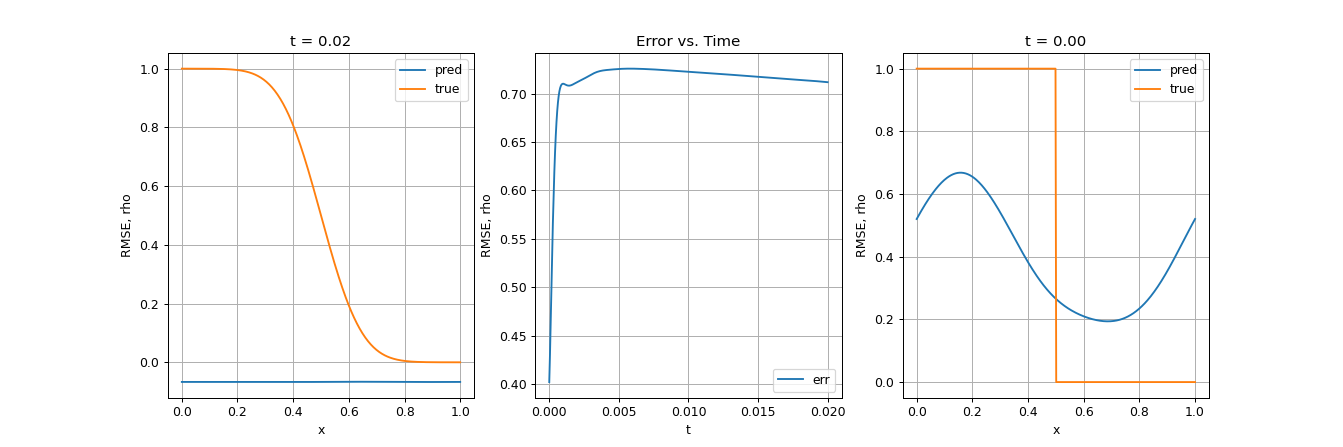

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 3, figsize = (15, 5))


ax[0].plot(x_test, rho_pred[-1], label = "pred")
ax[0].plot(x_test, rho_true[:, -1], label = "true")
ax[1].plot(t_test, errors, label = "err")

ax[0].set_xlabel("x")
ax[0].set_ylabel("RMSE, rho")
ax[0].set_title("t = {:.2f}".format(t_test[-1, 0]))
ax[1].set_xlabel("t")
ax[1].set_ylabel("RMSE, rho")
ax[1].set_title("Error vs. Time")

ax[2].plot(x_test, rho_pred[0], label = "pred")
ax[2].plot(x_test, rho_true[:, 0], label = "true")
ax[2].set_xlabel("x")
ax[2].set_ylabel("RMSE, rho")
ax[2].set_title("t = {:.2f}".format(t_test[0, 0]))

for ax_ in ax:
	ax_.legend()
	ax_.grid()

plt.show()